# Take-home Challenge 2: Relax Inc.
By Chantel Clark

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Load data

In [2]:
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# Rename object_id to user_id
users = users.rename(columns={'object_id':'user_id'})
users.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [5]:
# Set user_id to index
users.set_index('user_id', inplace=True)
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [7]:
engagement = pd.read_csv('takehome_user_engagement.csv', encoding = "ISO-8859-1")

In [8]:
engagement.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [9]:
engagement.visited.unique()

array([1], dtype=int64)

In [10]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
# Group engagement dataframe by user_id. Find total number of visits for each user.
grouped = engagement.groupby('user_id').sum()
grouped.head()

,visited
user_id,
1,1
2,14
3,1
4,1
5,1


In [12]:
# Return list of indices with 3 or more visits
subset_users = grouped.index[grouped['visited'] >= 3].tolist()
print(subset_users[:10])
print(len(subset_users), 'users with 3 or more visits')

[2, 10, 20, 33, 42, 43, 50, 53, 59, 60]
2248 users with 3 or more visits


### Case study for user ID 10

In [13]:
sample = engagement[engagement['user_id'] == 10]
sample

,time_stamp,user_id,visited
20,2013-01-16 22:08:03,10,1
21,2013-01-22 22:08:03,10,1
22,2013-01-30 22:08:03,10,1
23,2013-02-04 22:08:03,10,1
24,2013-02-06 22:08:03,10,1
...,...,...,...
299,2014-05-30 22:08:03,10,1
300,2014-05-31 22:08:03,10,1
301,2014-06-01 22:08:03,10,1
302,2014-06-02 22:08:03,10,1


In [14]:
# Create date and time column, to separate time_stamp
sample[['date', 'time']] = sample.time_stamp.str.split(' ', expand=True)
sample.head()

C:\Users\chant\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,time_stamp,user_id,visited,date,time
20,2013-01-16 22:08:03,10,1,2013-01-16,22:08:03
21,2013-01-22 22:08:03,10,1,2013-01-22,22:08:03
22,2013-01-30 22:08:03,10,1,2013-01-30,22:08:03
23,2013-02-04 22:08:03,10,1,2013-02-04,22:08:03
24,2013-02-06 22:08:03,10,1,2013-02-06,22:08:03


In [15]:
# Count logins by day
counts = sample.groupby('date').visited.count()
counts

date
2013-01-16    1
2013-01-22    1
2013-01-30    1
2013-02-04    1
2013-02-06    1
             ..
2014-05-30    1
2014-05-31    1
2014-06-01    1
2014-06-02    1
2014-06-03    1
Name: visited, Length: 284, dtype: int64

In [16]:
df = counts.to_frame().reset_index()
df.head()

,date,visited
0,2013-01-16,1
1,2013-01-22,1
2,2013-01-30,1
3,2013-02-04,1
4,2013-02-06,1


In [17]:
# convert dates to datetime
df.date = df.date.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [18]:
# Set datetime to index
df.set_index('date', inplace=True)

In [19]:
df

,visited
date,
2013-01-16,1
2013-01-22,1
2013-01-30,1
2013-02-04,1
2013-02-06,1
...,...
2014-05-30,1
2014-05-31,1
2014-06-01,1


In [20]:
for ind in df.index:
    end_window = ind + dt.timedelta(days=7)
    mask = (df.index >= ind) & (df.index < end_window)
    if len(df[mask]) >= 3:
        print(df[mask].visited)
        print('This is an adopted user!')
        break
    elif ind == df.index[-1]:
        print('This is NOT an adopted user.')

date
2013-02-14    1
2013-02-17    1
2013-02-19    1
Name: visited, dtype: int64
This is an adopted user!


## Find all adopted users

In [21]:
adopted_users = []
for user in subset_users:
    sample = engagement[engagement['user_id'] == user]
    # Create date and time column, to separate time_stamp
    sample[['date', 'time']] = sample.time_stamp.str.split(' ', expand=True)
    # Count logins by day
    counts = sample.groupby('date').visited.count()
    df = counts.to_frame().reset_index()
    # convert dates to datetime
    df.date = df.date.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    # Set datetime to index
    df.set_index('date', inplace=True)
    
    for ind in df.index:
        end_window = ind + dt.timedelta(days=7)
        mask = (df.index >= ind) & (df.index < end_window)
        if len(df[mask]) >= 3:
            print(df[mask].visited)
            print(user, 'is an adopted user!')
            adopted_users.append(user)
            break
        elif ind == df.index[-1]:
            print(user, 'is NOT an adopted user.')

date
2014-02-03    1
2014-02-08    1
2014-02-09    1
Name: visited, dtype: int64
2 is an adopted user!
date
2013-02-14    1
2013-02-17    1
2013-02-19    1
Name: visited, dtype: int64
10 is an adopted user!
date
2014-03-11    1
2014-03-12    1
2014-03-13    1
Name: visited, dtype: int64
20 is an adopted user!
date
2014-03-17    1
2014-03-22    1
2014-03-23    1
Name: visited, dtype: int64
33 is an adopted user!
date
2012-12-24    1
2012-12-25    1
2012-12-26    1
2012-12-28    1
Name: visited, dtype: int64
42 is an adopted user!
date
2013-03-08    1
2013-03-09    1
2013-03-11    1
2013-03-12    1
Name: visited, dtype: int64
43 is an adopted user!
date
2012-09-16    1
2012-09-20    1
2012-09-22    1
Name: visited, dtype: int64
50 is an adopted user!
date
2013-02-13    1
2013-02-15    1
2013-02-17    1
2013-02-18    1
Name: visited, dtype: int64
53 is an adopted user!
59 is NOT an adopted user.
60 is NOT an adopted user.
date
2013-01-24    1
2013-01-25    1
2013-01-26    1
2013-01-27    

date
2012-08-24    1
2012-08-29    1
2012-08-30    1
Name: visited, dtype: int64
509 is an adopted user!
date
2012-07-07    1
2012-07-09    1
2012-07-11    1
2012-07-12    1
Name: visited, dtype: int64
510 is an adopted user!
511 is NOT an adopted user.
date
2013-07-15    1
2013-07-17    1
2013-07-21    1
Name: visited, dtype: int64
512 is an adopted user!
date
2014-03-30    1
2014-03-31    1
2014-04-01    1
2014-04-02    1
2014-04-03    1
2014-04-04    1
Name: visited, dtype: int64
518 is an adopted user!
520 is NOT an adopted user.
date
2013-07-11    1
2013-07-12    1
2013-07-13    1
2013-07-16    1
Name: visited, dtype: int64
522 is an adopted user!
528 is NOT an adopted user.
date
2013-09-19    1
2013-09-23    1
2013-09-24    1
Name: visited, dtype: int64
529 is an adopted user!
date
2013-06-10    1
2013-06-14    1
2013-06-16    1
Name: visited, dtype: int64
535 is an adopted user!
date
2013-05-27    1
2013-05-28    1
2013-05-30    1
2013-05-31    1
2013-06-02    1
Name: visited, d

1087 is NOT an adopted user.
1088 is NOT an adopted user.
date
2013-03-14    1
2013-03-16    1
2013-03-18    1
Name: visited, dtype: int64
1089 is an adopted user!
date
2013-10-11    1
2013-10-14    1
2013-10-15    1
2013-10-16    1
Name: visited, dtype: int64
1093 is an adopted user!
date
2013-08-29    1
2013-08-31    1
2013-09-01    1
Name: visited, dtype: int64
1094 is an adopted user!
date
2012-12-21    1
2012-12-25    1
2012-12-26    1
Name: visited, dtype: int64
1099 is an adopted user!
date
2014-05-12    1
2014-05-13    1
2014-05-16    1
Name: visited, dtype: int64
1106 is an adopted user!
date
2013-07-21    1
2013-07-26    1
2013-07-27    1
Name: visited, dtype: int64
1107 is an adopted user!
date
2013-06-24    1
2013-06-26    1
2013-06-27    1
2013-06-30    1
Name: visited, dtype: int64
1119 is an adopted user!
date
2013-09-14    1
2013-09-15    1
2013-09-18    1
2013-09-19    1
Name: visited, dtype: int64
1123 is an adopted user!
date
2013-01-31    1
2013-02-01    1
2013-02-0

date
2013-07-11    1
2013-07-13    1
2013-07-16    1
Name: visited, dtype: int64
1598 is an adopted user!
1600 is NOT an adopted user.
date
2013-01-27    1
2013-01-30    1
2013-02-01    1
Name: visited, dtype: int64
1617 is an adopted user!
1621 is NOT an adopted user.
date
2013-03-24    1
2013-03-25    1
2013-03-28    1
Name: visited, dtype: int64
1624 is an adopted user!
date
2014-05-29    1
2014-06-01    1
2014-06-02    1
2014-06-03    1
Name: visited, dtype: int64
1641 is an adopted user!
date
2013-09-06    1
2013-09-08    1
2013-09-09    1
Name: visited, dtype: int64
1663 is an adopted user!
date
2013-03-25    1
2013-03-29    1
2013-03-30    1
Name: visited, dtype: int64
1665 is an adopted user!
1666 is NOT an adopted user.
date
2013-06-26    1
2013-06-29    1
2013-06-30    1
Name: visited, dtype: int64
1671 is an adopted user!
date
2013-04-26    1
2013-04-30    1
2013-05-02    1
Name: visited, dtype: int64
1672 is an adopted user!
date
2014-03-30    1
2014-04-04    1
2014-04-05  

date
2013-07-20    1
2013-07-24    1
2013-07-25    1
Name: visited, dtype: int64
2159 is an adopted user!
date
2014-01-25    1
2014-01-26    1
2014-01-27    1
Name: visited, dtype: int64
2160 is an adopted user!
date
2013-02-20    1
2013-02-21    1
2013-02-22    1
2013-02-23    1
2013-02-24    1
2013-02-26    1
Name: visited, dtype: int64
2171 is an adopted user!
2176 is NOT an adopted user.
date
2012-12-01    1
2012-12-04    1
2012-12-07    1
Name: visited, dtype: int64
2193 is an adopted user!
2194 is NOT an adopted user.
2196 is NOT an adopted user.
date
2013-05-05    1
2013-05-06    1
2013-05-07    1
Name: visited, dtype: int64
2199 is an adopted user!
date
2014-02-15    1
2014-02-19    1
2014-02-21    1
Name: visited, dtype: int64
2201 is an adopted user!
2206 is NOT an adopted user.
2220 is NOT an adopted user.
date
2013-01-27    1
2013-01-28    1
2013-01-31    1
Name: visited, dtype: int64
2239 is an adopted user!
date
2014-02-15    1
2014-02-17    1
2014-02-19    1
Name: visite

Name: visited, dtype: int64
2713 is an adopted user!
2714 is NOT an adopted user.
date
2013-04-20    1
2013-04-23    1
2013-04-24    1
Name: visited, dtype: int64
2723 is an adopted user!
date
2014-03-13    1
2014-03-14    1
2014-03-15    1
2014-03-16    1
Name: visited, dtype: int64
2724 is an adopted user!
date
2013-07-31    1
2013-08-03    1
2013-08-05    1
Name: visited, dtype: int64
2727 is an adopted user!
date
2014-02-16    1
2014-02-17    1
2014-02-22    1
Name: visited, dtype: int64
2731 is an adopted user!
date
2012-12-01    1
2012-12-02    1
2012-12-06    1
Name: visited, dtype: int64
2739 is an adopted user!
date
2012-08-23    1
2012-08-24    1
2012-08-29    1
Name: visited, dtype: int64
2744 is an adopted user!
2746 is NOT an adopted user.
date
2014-05-04    1
2014-05-05    1
2014-05-06    1
2014-05-08    1
Name: visited, dtype: int64
2750 is an adopted user!
date
2013-10-28    1
2013-10-30    1
2013-11-03    1
Name: visited, dtype: int64
2762 is an adopted user!
date
2012

date
2012-10-07    1
2012-10-08    1
2012-10-10    1
2012-10-12    1
Name: visited, dtype: int64
3175 is an adopted user!
3178 is NOT an adopted user.
date
2014-02-10    1
2014-02-11    1
2014-02-16    1
Name: visited, dtype: int64
3179 is an adopted user!
date
2013-04-21    1
2013-04-26    1
2013-04-27    1
Name: visited, dtype: int64
3180 is an adopted user!
3183 is NOT an adopted user.
date
2013-10-15    1
2013-10-17    1
2013-10-18    1
Name: visited, dtype: int64
3185 is an adopted user!
date
2013-04-14    1
2013-04-16    1
2013-04-17    1
Name: visited, dtype: int64
3193 is an adopted user!
date
2013-10-28    1
2013-10-29    1
2013-11-03    1
Name: visited, dtype: int64
3194 is an adopted user!
3201 is NOT an adopted user.
3203 is NOT an adopted user.
date
2013-05-06    1
2013-05-08    1
2013-05-11    1
Name: visited, dtype: int64
3204 is an adopted user!
date
2014-04-05    1
2014-04-06    1
2014-04-09    1
Name: visited, dtype: int64
3205 is an adopted user!
date
2013-03-16    1

date
2013-10-19    1
2013-10-21    1
2013-10-24    1
Name: visited, dtype: int64
3612 is an adopted user!
date
2014-03-10    1
2014-03-13    1
2014-03-14    1
Name: visited, dtype: int64
3617 is an adopted user!
date
2012-06-27    1
2012-07-01    1
2012-07-02    1
Name: visited, dtype: int64
3623 is an adopted user!
3626 is NOT an adopted user.
3634 is NOT an adopted user.
date
2013-02-19    1
2013-02-20    1
2013-02-25    1
Name: visited, dtype: int64
3638 is an adopted user!
3639 is NOT an adopted user.
date
2012-07-26    1
2012-07-28    1
2012-07-29    1
2012-08-01    1
Name: visited, dtype: int64
3641 is an adopted user!
date
2012-09-07    1
2012-09-12    1
2012-09-13    1
Name: visited, dtype: int64
3642 is an adopted user!
date
2013-07-17    1
2013-07-18    1
2013-07-20    1
Name: visited, dtype: int64
3644 is an adopted user!
date
2013-11-07    1
2013-11-08    1
2013-11-10    1
2013-11-11    1
2013-11-13    1
Name: visited, dtype: int64
3652 is an adopted user!
date
2013-01-21  

date
2014-02-15    1
2014-02-17    1
2014-02-21    1
Name: visited, dtype: int64
4182 is an adopted user!
date
2012-11-23    1
2012-11-26    1
2012-11-29    1
Name: visited, dtype: int64
4184 is an adopted user!
date
2012-09-09    1
2012-09-13    1
2012-09-14    1
Name: visited, dtype: int64
4186 is an adopted user!
4187 is NOT an adopted user.
4196 is NOT an adopted user.
4200 is NOT an adopted user.
date
2013-11-25    1
2013-11-29    1
2013-12-01    1
Name: visited, dtype: int64
4203 is an adopted user!
date
2013-11-11    1
2013-11-13    1
2013-11-16    1
2013-11-17    1
Name: visited, dtype: int64
4206 is an adopted user!
date
2014-01-03    1
2014-01-06    1
2014-01-08    1
Name: visited, dtype: int64
4208 is an adopted user!
date
2013-12-24    1
2013-12-29    1
2013-12-30    1
Name: visited, dtype: int64
4209 is an adopted user!
date
2013-10-21    1
2013-10-26    1
2013-10-27    1
Name: visited, dtype: int64
4216 is an adopted user!
date
2013-06-09    1
2013-06-10    1
2013-06-11  

date
2013-07-01    1
2013-07-02    1
2013-07-05    1
Name: visited, dtype: int64
4685 is an adopted user!
4701 is NOT an adopted user.
4703 is NOT an adopted user.
date
2012-12-15    1
2012-12-16    1
2012-12-19    1
Name: visited, dtype: int64
4709 is an adopted user!
4712 is NOT an adopted user.
date
2012-11-26    1
2012-11-28    1
2012-12-02    1
Name: visited, dtype: int64
4713 is an adopted user!
date
2014-05-11    1
2014-05-13    1
2014-05-17    1
Name: visited, dtype: int64
4715 is an adopted user!
date
2014-01-10    1
2014-01-11    1
2014-01-13    1
Name: visited, dtype: int64
4720 is an adopted user!
4726 is NOT an adopted user.
4729 is NOT an adopted user.
date
2012-11-27    1
2012-11-28    1
2012-12-03    1
Name: visited, dtype: int64
4730 is an adopted user!
4731 is NOT an adopted user.
4738 is NOT an adopted user.
date
2012-09-10    1
2012-09-11    1
2012-09-14    1
Name: visited, dtype: int64
4742 is an adopted user!
date
2013-01-06    1
2013-01-07    1
2013-01-12    1
Na

date
2013-05-05    1
2013-05-06    1
2013-05-11    1
Name: visited, dtype: int64
5215 is an adopted user!
date
2012-10-18    1
2012-10-21    1
2012-10-23    1
Name: visited, dtype: int64
5225 is an adopted user!
date
2012-08-15    1
2012-08-19    1
2012-08-21    1
Name: visited, dtype: int64
5240 is an adopted user!
date
2013-02-06    1
2013-02-09    1
2013-02-12    1
Name: visited, dtype: int64
5243 is an adopted user!
5246 is NOT an adopted user.
5254 is NOT an adopted user.
5255 is NOT an adopted user.
date
2012-10-14    1
2012-10-16    1
2012-10-18    1
Name: visited, dtype: int64
5259 is an adopted user!
5267 is NOT an adopted user.
date
2012-10-19    1
2012-10-23    1
2012-10-24    1
Name: visited, dtype: int64
5281 is an adopted user!
5291 is NOT an adopted user.
5294 is NOT an adopted user.
date
2012-06-20    1
2012-06-22    1
2012-06-24    1
2012-06-25    1
Name: visited, dtype: int64
5297 is an adopted user!
date
2013-11-11    1
2013-11-15    1
2013-11-16    1
Name: visited, 

date
2014-04-22    1
2014-04-23    1
2014-04-28    1
Name: visited, dtype: int64
5725 is an adopted user!
date
2014-04-18    1
2014-04-19    1
2014-04-20    1
Name: visited, dtype: int64
5726 is an adopted user!
5728 is NOT an adopted user.
5730 is NOT an adopted user.
5739 is NOT an adopted user.
date
2014-03-09    1
2014-03-11    1
2014-03-12    1
2014-03-13    1
Name: visited, dtype: int64
5741 is an adopted user!
5742 is NOT an adopted user.
date
2014-01-31    1
2014-02-02    1
2014-02-03    1
2014-02-06    1
Name: visited, dtype: int64
5743 is an adopted user!
date
2014-02-19    1
2014-02-21    1
2014-02-23    1
2014-02-24    1
Name: visited, dtype: int64
5756 is an adopted user!
5761 is NOT an adopted user.
date
2014-03-27    1
2014-03-28    1
2014-04-01    1
2014-04-02    1
Name: visited, dtype: int64
5777 is an adopted user!
5789 is NOT an adopted user.
5795 is NOT an adopted user.
5798 is NOT an adopted user.
date
2014-02-14    1
2014-02-16    1
2014-02-17    1
Name: visited, 

date
2013-02-21    1
2013-02-22    1
2013-02-24    1
Name: visited, dtype: int64
6293 is an adopted user!
date
2014-03-14    1
2014-03-19    1
2014-03-20    1
Name: visited, dtype: int64
6296 is an adopted user!
date
2013-12-23    1
2013-12-28    1
2013-12-29    1
Name: visited, dtype: int64
6302 is an adopted user!
date
2014-05-04    1
2014-05-09    1
2014-05-10    1
Name: visited, dtype: int64
6305 is an adopted user!
date
2012-09-04    1
2012-09-06    1
2012-09-09    1
2012-09-10    1
Name: visited, dtype: int64
6312 is an adopted user!
date
2013-12-06    1
2013-12-08    1
2013-12-09    1
2013-12-10    1
2013-12-11    1
Name: visited, dtype: int64
6321 is an adopted user!
date
2013-03-03    1
2013-03-07    1
2013-03-09    1
Name: visited, dtype: int64
6322 is an adopted user!
date
2013-01-12    1
2013-01-15    1
2013-01-16    1
2013-01-17    1
Name: visited, dtype: int64
6342 is an adopted user!
date
2014-02-17    1
2014-02-18    1
2014-02-20    1
Name: visited, dtype: int64
6349 is

6900 is NOT an adopted user.
date
2012-11-23    1
2012-11-24    1
2012-11-25    1
Name: visited, dtype: int64
6909 is an adopted user!
date
2013-12-15    1
2013-12-20    1
2013-12-21    1
Name: visited, dtype: int64
6913 is an adopted user!
date
2012-11-29    1
2012-12-02    1
2012-12-04    1
Name: visited, dtype: int64
6914 is an adopted user!
6916 is NOT an adopted user.
date
2014-05-28    1
2014-05-30    1
2014-06-03    1
Name: visited, dtype: int64
6922 is an adopted user!
date
2014-03-30    1
2014-04-03    1
2014-04-05    1
Name: visited, dtype: int64
6924 is an adopted user!
date
2013-01-02    1
2013-01-03    1
2013-01-06    1
Name: visited, dtype: int64
6938 is an adopted user!
date
2014-05-13    1
2014-05-18    1
2014-05-19    1
Name: visited, dtype: int64
6956 is an adopted user!
6962 is NOT an adopted user.
date
2013-01-05    1
2013-01-07    1
2013-01-11    1
Name: visited, dtype: int64
6963 is an adopted user!
6965 is NOT an adopted user.
date
2013-01-10    1
2013-01-12    1

7498 is NOT an adopted user.
7503 is NOT an adopted user.
date
2012-10-30    1
2012-11-03    1
2012-11-04    1
Name: visited, dtype: int64
7511 is an adopted user!
date
2014-01-21    1
2014-01-25    1
2014-01-26    1
2014-01-27    1
Name: visited, dtype: int64
7518 is an adopted user!
date
2012-07-07    1
2012-07-08    1
2012-07-09    1
2012-07-10    1
2012-07-12    1
2012-07-13    1
Name: visited, dtype: int64
7529 is an adopted user!
date
2012-09-24    1
2012-09-27    1
2012-09-28    1
Name: visited, dtype: int64
7536 is an adopted user!
date
2012-11-19    1
2012-11-20    1
2012-11-21    1
Name: visited, dtype: int64
7538 is an adopted user!
7539 is NOT an adopted user.
date
2014-02-23    1
2014-02-24    1
2014-02-28    1
Name: visited, dtype: int64
7544 is an adopted user!
7549 is NOT an adopted user.
date
2013-01-25    1
2013-01-28    1
2013-01-30    1
Name: visited, dtype: int64
7555 is an adopted user!
date
2013-04-10    1
2013-04-11    1
2013-04-13    1
2013-04-16    1
Name: vis

date
2013-09-11    1
2013-09-12    1
2013-09-15    1
Name: visited, dtype: int64
8025 is an adopted user!
date
2012-08-11    1
2012-08-13    1
2012-08-15    1
2012-08-16    1
Name: visited, dtype: int64
8029 is an adopted user!
date
2013-03-20    1
2013-03-22    1
2013-03-26    1
Name: visited, dtype: int64
8031 is an adopted user!
date
2013-11-30    1
2013-12-02    1
2013-12-03    1
2013-12-05    1
2013-12-06    1
Name: visited, dtype: int64
8033 is an adopted user!
date
2012-07-27    1
2012-07-28    1
2012-08-01    1
Name: visited, dtype: int64
8034 is an adopted user!
date
2013-11-07    1
2013-11-12    1
2013-11-13    1
Name: visited, dtype: int64
8037 is an adopted user!
date
2013-08-07    1
2013-08-11    1
2013-08-13    1
Name: visited, dtype: int64
8046 is an adopted user!
8047 is NOT an adopted user.
date
2013-09-09    1
2013-09-11    1
2013-09-15    1
Name: visited, dtype: int64
8048 is an adopted user!
date
2013-11-29    1
2013-11-30    1
2013-12-04    1
Name: visited, dtype: 

Name: visited, dtype: int64
8508 is an adopted user!
date
2013-10-03    1
2013-10-06    1
2013-10-07    1
Name: visited, dtype: int64
8511 is an adopted user!
8514 is NOT an adopted user.
date
2014-03-04    1
2014-03-05    1
2014-03-07    1
2014-03-08    1
Name: visited, dtype: int64
8523 is an adopted user!
date
2013-08-21    1
2013-08-23    1
2013-08-26    1
Name: visited, dtype: int64
8538 is an adopted user!
date
2012-07-29    1
2012-07-30    1
2012-08-02    1
Name: visited, dtype: int64
8553 is an adopted user!
8555 is NOT an adopted user.
8564 is NOT an adopted user.
date
2013-11-29    1
2013-12-01    1
2013-12-02    1
2013-12-05    1
Name: visited, dtype: int64
8569 is an adopted user!
date
2014-03-25    1
2014-03-28    1
2014-03-30    1
Name: visited, dtype: int64
8571 is an adopted user!
8574 is NOT an adopted user.
date
2014-03-17    1
2014-03-21    1
2014-03-23    1
Name: visited, dtype: int64
8581 is an adopted user!
8585 is NOT an adopted user.
date
2014-04-09    1
2014-04

date
2013-02-04    1
2013-02-08    1
2013-02-09    1
2013-02-10    1
Name: visited, dtype: int64
9076 is an adopted user!
9077 is NOT an adopted user.
date
2012-12-08    1
2012-12-13    1
2012-12-14    1
Name: visited, dtype: int64
9079 is an adopted user!
date
2012-07-31    1
2012-08-02    1
2012-08-03    1
2012-08-04    1
Name: visited, dtype: int64
9083 is an adopted user!
9085 is NOT an adopted user.
9088 is NOT an adopted user.
date
2014-01-06    1
2014-01-07    1
2014-01-08    1
Name: visited, dtype: int64
9089 is an adopted user!
date
2013-01-20    1
2013-01-22    1
2013-01-26    1
Name: visited, dtype: int64
9112 is an adopted user!
date
2013-11-03    1
2013-11-08    1
2013-11-09    1
Name: visited, dtype: int64
9113 is an adopted user!
date
2012-10-28    1
2012-11-02    1
2012-11-03    1
Name: visited, dtype: int64
9120 is an adopted user!
9135 is NOT an adopted user.
9137 is NOT an adopted user.
date
2013-07-11    1
2013-07-12    1
2013-07-17    1
Name: visited, dtype: int64


date
2013-03-05    1
2013-03-09    1
2013-03-11    1
Name: visited, dtype: int64
9645 is an adopted user!
date
2014-02-04    1
2014-02-07    1
2014-02-08    1
2014-02-10    1
Name: visited, dtype: int64
9652 is an adopted user!
date
2013-04-09    1
2013-04-13    1
2013-04-14    1
Name: visited, dtype: int64
9660 is an adopted user!
9661 is NOT an adopted user.
date
2014-05-09    1
2014-05-11    1
2014-05-12    1
Name: visited, dtype: int64
9670 is an adopted user!
date
2013-12-19    1
2013-12-21    1
2013-12-22    1
Name: visited, dtype: int64
9679 is an adopted user!
date
2014-03-10    1
2014-03-11    1
2014-03-13    1
Name: visited, dtype: int64
9683 is an adopted user!
date
2014-05-04    1
2014-05-05    1
2014-05-08    1
2014-05-10    1
Name: visited, dtype: int64
9684 is an adopted user!
date
2012-09-16    1
2012-09-19    1
2012-09-21    1
Name: visited, dtype: int64
9691 is an adopted user!
date
2013-02-26    1
2013-02-28    1
2013-03-02    1
Name: visited, dtype: int64
9694 is an

Name: visited, dtype: int64
10199 is an adopted user!
date
2013-07-30    1
2013-08-01    1
2013-08-02    1
Name: visited, dtype: int64
10207 is an adopted user!
date
2013-12-11    1
2013-12-12    1
2013-12-15    1
Name: visited, dtype: int64
10211 is an adopted user!
date
2013-09-09    1
2013-09-12    1
2013-09-13    1
2013-09-14    1
Name: visited, dtype: int64
10212 is an adopted user!
10217 is NOT an adopted user.
date
2013-03-24    1
2013-03-25    1
2013-03-29    1
Name: visited, dtype: int64
10222 is an adopted user!
date
2013-10-11    1
2013-10-13    1
2013-10-17    1
Name: visited, dtype: int64
10225 is an adopted user!
date
2013-07-03    1
2013-07-07    1
2013-07-08    1
Name: visited, dtype: int64
10230 is an adopted user!
date
2013-12-29    1
2013-12-30    1
2014-01-02    1
2014-01-03    1
Name: visited, dtype: int64
10233 is an adopted user!
date
2013-11-14    1
2013-11-16    1
2013-11-19    1
Name: visited, dtype: int64
10234 is an adopted user!
date
2012-12-04    1
2012-12

date
2013-06-06    1
2013-06-11    1
2013-06-12    1
Name: visited, dtype: int64
10621 is an adopted user!
date
2014-04-28    1
2014-04-30    1
2014-05-01    1
Name: visited, dtype: int64
10626 is an adopted user!
10627 is NOT an adopted user.
date
2012-11-27    1
2012-11-30    1
2012-12-01    1
Name: visited, dtype: int64
10630 is an adopted user!
10631 is NOT an adopted user.
date
2012-12-21    1
2012-12-22    1
2012-12-25    1
Name: visited, dtype: int64
10634 is an adopted user!
date
2012-08-30    1
2012-09-02    1
2012-09-05    1
Name: visited, dtype: int64
10639 is an adopted user!
date
2013-04-26    1
2013-04-28    1
2013-05-01    1
Name: visited, dtype: int64
10644 is an adopted user!
date
2013-05-25    1
2013-05-26    1
2013-05-30    1
Name: visited, dtype: int64
10647 is an adopted user!
10648 is NOT an adopted user.
10649 is NOT an adopted user.
date
2012-11-17    1
2012-11-21    1
2012-11-23    1
Name: visited, dtype: int64
10656 is an adopted user!
date
2013-06-13    1
201

11123 is NOT an adopted user.
date
2013-07-09    1
2013-07-11    1
2013-07-12    1
Name: visited, dtype: int64
11130 is an adopted user!
11133 is NOT an adopted user.
date
2012-09-04    1
2012-09-07    1
2012-09-10    1
Name: visited, dtype: int64
11144 is an adopted user!
date
2012-08-31    1
2012-09-05    1
2012-09-06    1
Name: visited, dtype: int64
11160 is an adopted user!
11164 is NOT an adopted user.
date
2012-08-05    1
2012-08-08    1
2012-08-10    1
Name: visited, dtype: int64
11169 is an adopted user!
date
2013-09-24    1
2013-09-25    1
2013-09-26    1
2013-09-27    1
2013-09-28    1
Name: visited, dtype: int64
11170 is an adopted user!
date
2013-12-18    1
2013-12-21    1
2013-12-23    1
Name: visited, dtype: int64
11176 is an adopted user!
date
2012-10-11    1
2012-10-12    1
2012-10-13    1
2012-10-16    1
2012-10-17    1
Name: visited, dtype: int64
11186 is an adopted user!
11190 is NOT an adopted user.
11191 is NOT an adopted user.
11194 is NOT an adopted user.
date
20

11636 is NOT an adopted user.
date
2014-04-21    1
2014-04-23    1
2014-04-24    1
Name: visited, dtype: int64
11637 is an adopted user!
11639 is NOT an adopted user.
date
2013-05-23    1
2013-05-27    1
2013-05-29    1
Name: visited, dtype: int64
11642 is an adopted user!
11646 is NOT an adopted user.
date
2013-02-01    1
2013-02-03    1
2013-02-07    1
Name: visited, dtype: int64
11660 is an adopted user!
date
2014-01-12    1
2014-01-15    1
2014-01-18    1
Name: visited, dtype: int64
11662 is an adopted user!
date
2014-02-23    1
2014-02-26    1
2014-03-01    1
Name: visited, dtype: int64
11671 is an adopted user!
date
2014-05-31    1
2014-06-01    1
2014-06-02    1
2014-06-03    1
Name: visited, dtype: int64
11682 is an adopted user!
date
2013-10-29    1
2013-10-31    1
2013-11-02    1
2013-11-04    1
Name: visited, dtype: int64
11683 is an adopted user!
date
2012-09-26    1
2012-09-29    1
2012-09-30    1
2012-10-01    1
Name: visited, dtype: int64
11688 is an adopted user!
11690 

In [22]:
len(adopted_users)

1602

There are 1602 adopted users.

In [23]:
# ID's of the adopted users
adopted_users[:10]

[2, 10, 20, 33, 42, 43, 50, 53, 63, 69]

## Feature engineering
Create new column for adopted users

In [24]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


There are two columns with null values: last_session_creation_time and invited_by_user_id.

In [26]:
users[users.last_session_creation_time.isnull()]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0
15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,NaN
16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,NaN
...,...,...,...,...,...,...,...,...,...
11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,NaN
11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,NaN
11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,74,NaN


Fill NaN values for last_session_creation_time with 0, I suppose this means that the user never created a session. Fill NaN values for invited_by_user_id with 0 also, this means that they were not invited by another user.

In [27]:
users.fillna(0, inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [28]:
users.invited_by_user_id.unique()

array([10803.,   316.,  1525., ...,  5093., 11854.,  5450.])

In [29]:
# Create new column 'invted_by_adopted_user'
users['invited_by_adopted_user'] = 0

In [30]:
# Set 'invited_by_adopted_user' = 1 if invited by an adopted user
for userid in users.invited_by_user_id:
    if userid in adopted_users:
        inds = users[users.loc[:, 'invited_by_user_id'] == userid].index
        users.loc[inds, 'invited_by_adopted_user'] = 1

In [31]:
# Total number of people invited by an adopted user
users.invited_by_adopted_user.sum()

1089

In [32]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 10 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
invited_by_adopted_user       12000 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ MB


In [33]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_adopted_user
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


In [34]:
# Create a new column 'adopted_user' and set = 0, meaning not an adopted user by default
users['adopted_user'] = 0

In [35]:
# Set 'adopted_user' = 1 for all adopted user ids
for adopted_id in adopted_users:
    users.loc[adopted_id, 'adopted_user'] = 1

In [36]:
X = users.drop('adopted_user', 1)
y = users['adopted_user']

In [37]:
X.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_adopted_user
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


In [38]:
X['creation_time'] = pd.to_datetime(X['creation_time'])

In [39]:
# Extract only year, month and date from 'creation_time'
X['creation_time'] = X['creation_time'].apply(lambda x: x.strftime('%Y-%m-%d')) 

In [40]:
X = X.drop(['name', 'email'], 1)
X.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_adopted_user
user_id,,,,,,,,
1,2014-04-22,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
3,2013-03-19,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
4,2013-05-21,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
5,2013-01-17,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


In [41]:
# Create 'last_session' column, which converts last_session_creation_time to readable time
X['last_session'] = X['last_session_creation_time'].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [42]:
X.head(10)

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_adopted_user,last_session
user_id,,,,,,,,,
1,2014-04-22,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,2014-04-21
2,2013-11-15,ORG_INVITE,1.396238e+09,0,0,1,316.0,0,2014-03-30
3,2013-03-19,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,2013-03-19
4,2013-05-21,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,2013-05-21
5,2013-01-17,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,2013-01-22
6,2013-12-17,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0,2013-12-18
7,2012-12-16,SIGNUP,1.356010e+09,0,1,37,0.0,0,2012-12-20
8,2013-07-31,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,0,1969-12-31
9,2013-11-05,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,0,1969-12-31


In [43]:
# The NaN values will have this value
dt.datetime.fromtimestamp(0).strftime('%Y-%m-%d')

'1969-12-31'

In [44]:
X = X.drop(['last_session_creation_time', 'invited_by_user_id'], 1)
X.head()

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_adopted_user,last_session
user_id,,,,,,,
1,2014-04-22,GUEST_INVITE,1,0,11,0,2014-04-21
2,2013-11-15,ORG_INVITE,0,0,1,0,2014-03-30
3,2013-03-19,ORG_INVITE,0,0,94,1,2013-03-19
4,2013-05-21,GUEST_INVITE,0,0,1,1,2013-05-21
5,2013-01-17,GUEST_INVITE,0,0,193,1,2013-01-22


In [45]:
# Last login date - creation date = days active
tdelta = pd.to_datetime(X.last_session) - pd.to_datetime(X.creation_time)
# Convert timedelta to integer
tdelta = tdelta.dt.days

In [46]:
tdelta

user_id
1         -1
2        135
3          0
4          0
5          5
        ... 
11996     -1
11997      5
11998      0
11999      2
12000     -1
Length: 12000, dtype: int64

In [47]:
# Convert negative values to zero
tdelta[tdelta < 0] = 0
tdelta

C:\Users\chant\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  
C:\Users\chant\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._update_inplace(new_data)


user_id
1          0
2        135
3          0
4          0
5          5
        ... 
11996      0
11997      5
11998      0
11999      2
12000      0
Length: 12000, dtype: int64

In [48]:
X = pd.concat([X, tdelta], axis=1)

In [49]:
X = X.rename(columns={0:'tdelta'})
X.columns

Index(['creation_time', 'creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_adopted_user',
       'last_session', 'tdelta'],
      dtype='object')

In [51]:
# Make 'year_created' column
X['year_created'] = X['creation_time'].apply(lambda x: int(x.split('-')[0]))

In [53]:
X.year_created.unique()

array([2014, 2013, 2012], dtype=int64)

In [54]:
X.drop(['creation_time', 'last_session'], axis=1, inplace=True)

In [55]:
X.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_adopted_user,tdelta,year_created
user_id,,,,,,,
1,GUEST_INVITE,1,0,11,0,0,2014
2,ORG_INVITE,0,0,1,0,135,2013
3,ORG_INVITE,0,0,94,1,0,2013
4,GUEST_INVITE,0,0,1,1,0,2013
5,GUEST_INVITE,0,0,193,1,5,2013


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 7 columns):
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_adopted_user       12000 non-null int64
tdelta                        12000 non-null int64
year_created                  12000 non-null int64
dtypes: int64(6), object(1)
memory usage: 750.0+ KB


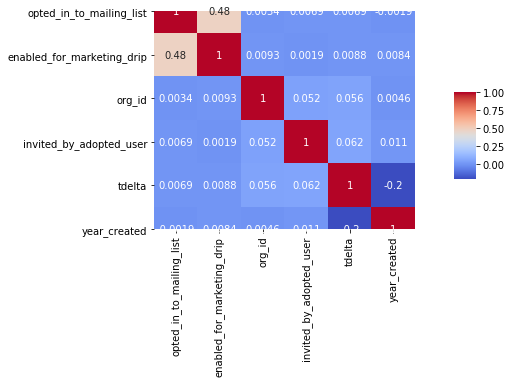

In [57]:
# Correlation of variables
fig, ax = plt.subplots(1, 1)
cbar_ax = fig.add_axes([.905, .3, .05, .3])
sns.heatmap(X.corr(), annot=True, square=True, ax=ax, cbar_ax=cbar_ax, cmap='coolwarm')

The correlation blot looks fine, with highest correlation between opted into mailing list and enabled for marketing drip. Otherwise, there is little to no correlation among variables.

In [58]:
print(len(X.org_id.unique()))

417


In [59]:
dummies = pd.get_dummies(X, columns=['creation_source', 'org_id'])

In [60]:
dummies.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_adopted_user,tdelta,year_created,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,2014,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,135,2013,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,2013,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,2013,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,5,2013,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dummies.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_adopted_user', 'tdelta', 'year_created',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH',
       ...
       'org_id_407', 'org_id_408', 'org_id_409', 'org_id_410', 'org_id_411',
       'org_id_412', 'org_id_413', 'org_id_414', 'org_id_415', 'org_id_416'],
      dtype='object', length=427)

Wall time: 5.52 s


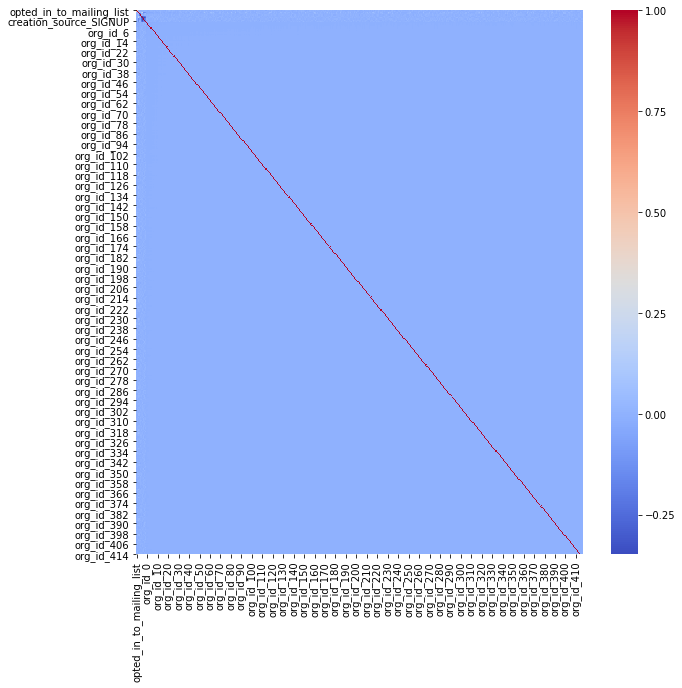

In [62]:
%%time
# Correlation heatmap

plt.figure(figsize=(10,10))
sns.heatmap(dummies.corr(), cmap='coolwarm')

In [63]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dummies, y, test_size=0.2, random_state=50)

In [64]:
X_train.shape

(9600, 427)

In [65]:
X_test.shape

(2400, 427)

## Logistic regression 1

In [66]:
# Instantiate Logistic Regression with L1 (Lasso) penalty
logistic_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=int(1e6), random_state=20)
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=20, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = logistic_reg.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2052   20]
 [  44  284]]


In [69]:
acc = logistic_reg.score(X_test, y_test)
acc

0.9733333333333334

In [70]:
results = pd.DataFrame({'feature':dummies.columns.values, 'coefficients':logistic_reg.coef_[0]})
results

,feature,coefficients
0,opted_in_to_mailing_list,1.399754e-04
1,enabled_for_marketing_drip,-8.014125e-06
2,invited_by_adopted_user,3.191059e-04
3,tdelta,6.345967e-02
4,year_created,-2.387061e-03
...,...,...
422,org_id_412,0.000000e+00
423,org_id_413,0.000000e+00
424,org_id_414,-3.223412e-07
425,org_id_415,0.000000e+00


In [71]:
# Positive coefficients
greatest_coefs = sorted(logistic_reg.coef_[0], reverse=True)[:5]
inds = []
for coef in greatest_coefs:
    inds.append(results[results.coefficients==coef].index[0])
    
results.iloc[inds]

,feature,coefficients
3,tdelta,0.063460
2,invited_by_adopted_user,0.000319
0,opted_in_to_mailing_list,0.000140
5,creation_source_GUEST_INVITE,0.000087
40,org_id_30,0.000048


In [72]:
# Negative coefficients
neg_coefs = sorted(logistic_reg.coef_[0])[:5]
inds=[]
for coef in neg_coefs:
    inds.append(results[results.coefficients==coef].index[0])
results.iloc[inds]

,feature,coefficients
4,year_created,-0.002387
7,creation_source_PERSONAL_PROJECTS,-0.000225
10,org_id_0,-0.000053
11,org_id_1,-0.000048
22,org_id_12,-0.000018


## Logistic regression 2, without tdelta

In [73]:
# Try logistic regression again without tdelta
run2 = dummies.drop('tdelta', 1)
run2.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_adopted_user', 'year_created',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'org_id_0',
       ...
       'org_id_407', 'org_id_408', 'org_id_409', 'org_id_410', 'org_id_411',
       'org_id_412', 'org_id_413', 'org_id_414', 'org_id_415', 'org_id_416'],
      dtype='object', length=426)

In [74]:
%%time
X_train, X_test, y_train, y_test = train_test_split(run2, y, test_size=0.2, random_state=80)
logistic_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=int(1e4), random_state=20)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2075    0]
 [ 325    0]]
Wall time: 6min 52s


In [75]:
acc = logistic_reg.score(X_test, y_test)
acc

0.8645833333333334

In [76]:
results = pd.DataFrame({'feature':run2.columns.values, 'coefficients':logistic_reg.coef_[0]})
results.head()

,feature,coefficients
0,opted_in_to_mailing_list,0.008364
1,enabled_for_marketing_drip,0.019794
2,invited_by_adopted_user,0.171478
3,year_created,-0.000936
4,creation_source_GUEST_INVITE,0.155092


In [77]:
# Positive coefficients
greatest_coefs = sorted(logistic_reg.coef_[0], reverse=True)[:5]
inds = []
for coef in greatest_coefs:
    inds.append(results[results.coefficients==coef].index[0])
    
results.iloc[inds]

,feature,coefficients
2,invited_by_adopted_user,0.171478
4,creation_source_GUEST_INVITE,0.155092
8,creation_source_SIGNUP_GOOGLE_AUTH,0.093291
7,creation_source_SIGNUP,0.039643
1,enabled_for_marketing_drip,0.019794


In [78]:
# Negative coefficients
neg_coefs = sorted(logistic_reg.coef_[0])[:5]
inds=[]
for coef in neg_coefs:
    inds.append(results[results.coefficients==coef].index[0])
results.iloc[inds]

,feature,coefficients
6,creation_source_PERSONAL_PROJECTS,-0.243884
9,org_id_0,-0.081181
5,creation_source_ORG_INVITE,-0.047321
10,org_id_1,-0.037226
11,org_id_2,-0.028309
